# Introduction 

**Introduction:**

The Aspiring Minds Employment Outcome (AMEO) 2015 dataset offers a comprehensive view of the employment outcomes of engineering graduates in India, focusing on how skills and demographic factors influence career paths. This dataset serves as a valuable resource to explore key predictors for job titles, job locations, and salary, helping to understand the relationships between cognitive, technical, and personality skills and career success.

**Problem Statement:**

The objective is to examine the factors influencing employment outcomes of engineering graduates by analyzing cognitive, technical, and personality skills along with demographic factors. The goal is to identify the significant predictors that impact job titles, locations, and salaries, thus providing actionable insights into how these variables shape career success in the engineering field.

**Data Description:**

Records: 4000

Independent Variables: 40 (continuous and categorical)

Key Variables:

    1.Cognitive Skills
    2.Technical Skills
    3.Personality Traits
    4.Demographic Details (e.g., age, gender, education)
    5.Employment Outcomes (Salary, Job Titles, Job Locations)
    
**Objective:**
To analyze and determine the influence of various cognitive, technical, personality skills, and demographic factors on employment outcomes, focusing on:

    1.Salary
    2.Job Titles
    3.Job Locations
    
By studying these relationships, we aim to uncover the critical factors that influence the career trajectories of engineering graduates, helping educators, policymakers, and employers better understand and enhance employability in the engineering sector.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\Y SAI KUMAR\PycharmProjects\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing the Data

In [2]:
df = pd.read_excel(r"C:\Users\Y SAI KUMAR\Downloads\amcat.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [6]:
# It provides statistical summary of numerical columns
df.describe

<bound method NDFrame.describe of           ID   Salary        DOJ                  DOL  \
0     203097   420000 2012-06-01              present   
1     579905   500000 2013-09-01              present   
2     810601   325000 2014-06-01              present   
3     267447  1100000 2011-07-01              present   
4     343523   200000 2014-03-01  2015-03-01 00:00:00   
...      ...      ...        ...                  ...   
3993   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995  355888   320000 2013-07-01              present   
3996  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 199

In [7]:
# It displays the dimensions of the data
df.shape

(3998, 38)

# EDA - Exploratary Data Analysis

In [8]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
df.duplicated().sum()

0

# Univariate Analysis: Numerical Variables

# 1.Distribution of Salary

In [10]:
df["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

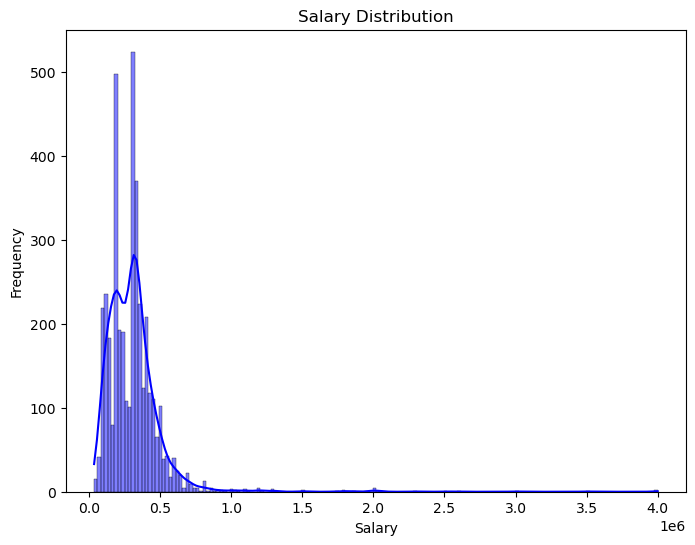

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df['Salary'],kde=True,color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Observation:** 

The salary distribution is right-skewed, with most engineers earning below the mean. A few graduates earn significantly higher salaries, pulling the average upward.

# 2.Average GPA of college students?

In [12]:
df["collegeGPA"].mean()

71.48617058529265

# 3.Distribution of CollegeGPA

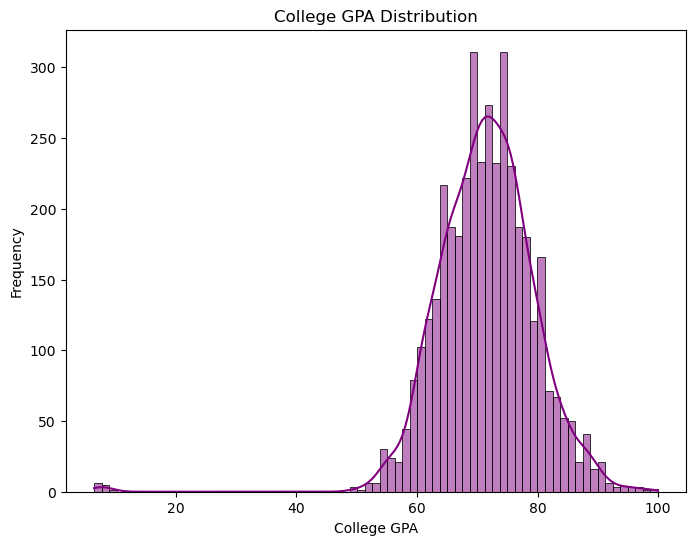

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['collegeGPA'], kde=True, color='purple')
plt.title('College GPA Distribution')
plt.xlabel('College GPA')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The College GPA is predominantly concentrated between 6.0 and 8.0, suggesting that the majority of students maintain a decent academic performance during their college years. This range indicates that most students perform consistently well, though not exceptionally high or low, reflecting a solid academic foundation for the majority.

# 4.Distribution of 10th Percentage 

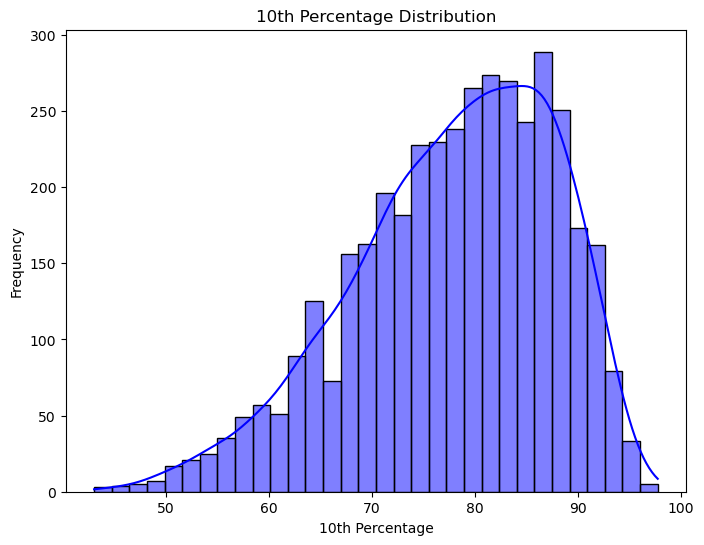

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['10percentage'], kde=True, color='blue')
plt.title('10th Percentage Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The majority of students scored between 60% and 80% in their 10th-grade exams, indicating that most students performed moderately well. A smaller proportion of students achieved percentages either above 80% or below 60%, suggesting that exceptional or lower performance was less common within this group.

# 5.Distribution of 12th Percentage 

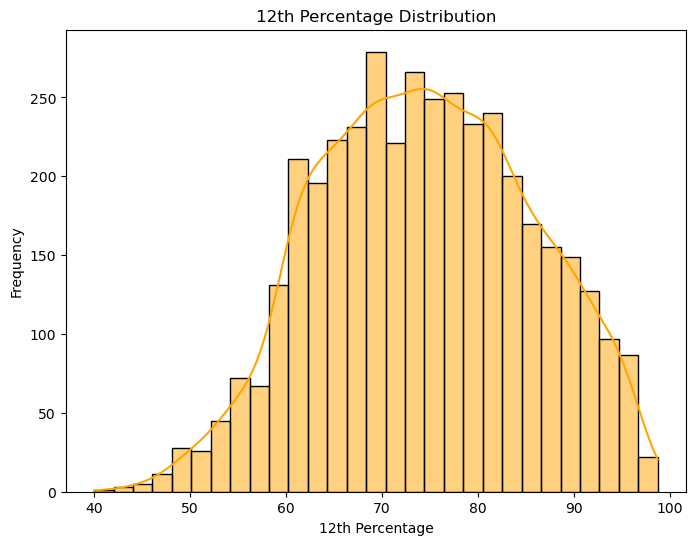

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['12percentage'], kde=True, color='orange')
plt.title('12th Percentage Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The distribution of 12th-grade percentages mirrors the trend observed in the 10th-grade scores, with the majority of students achieving percentages between 60% and 80%. This suggests consistent academic performance across both grades for most students, with fewer students scoring significantly higher or lower.

# 6.Histograms - Numerical Columns

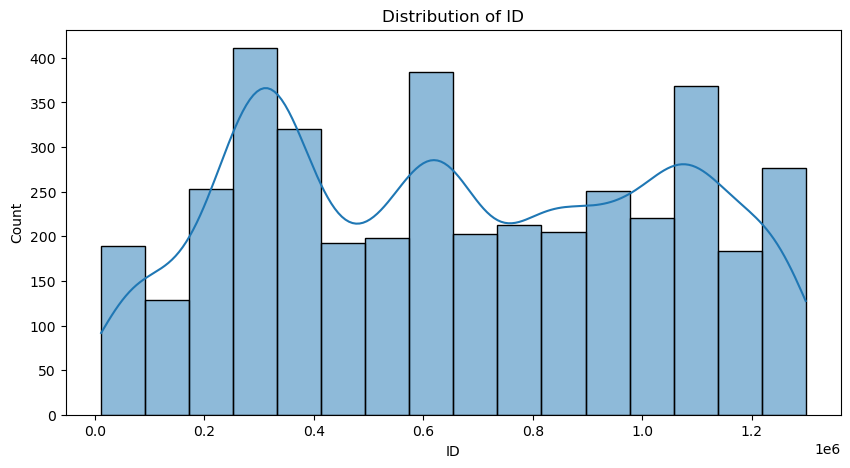

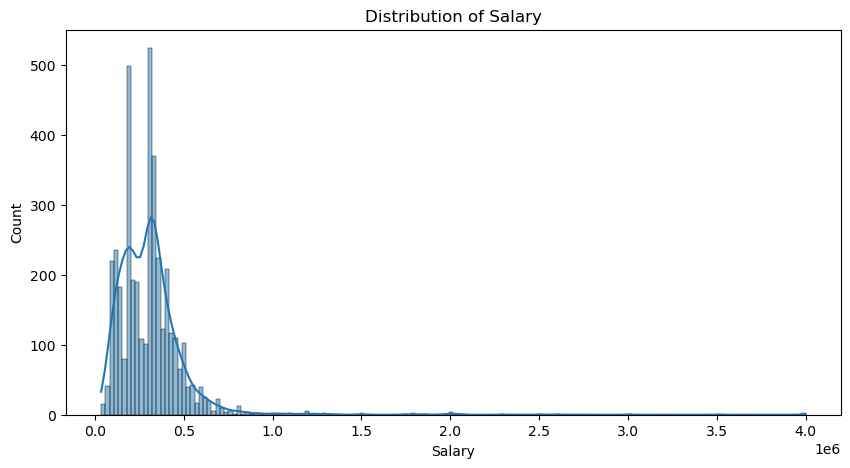

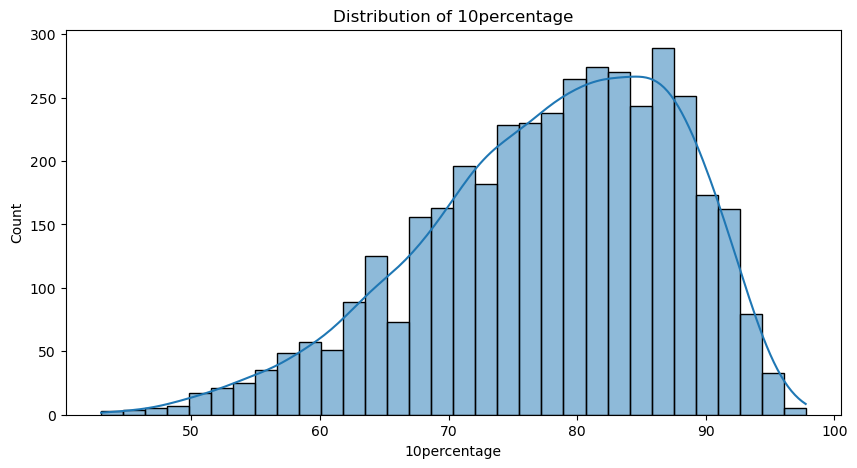

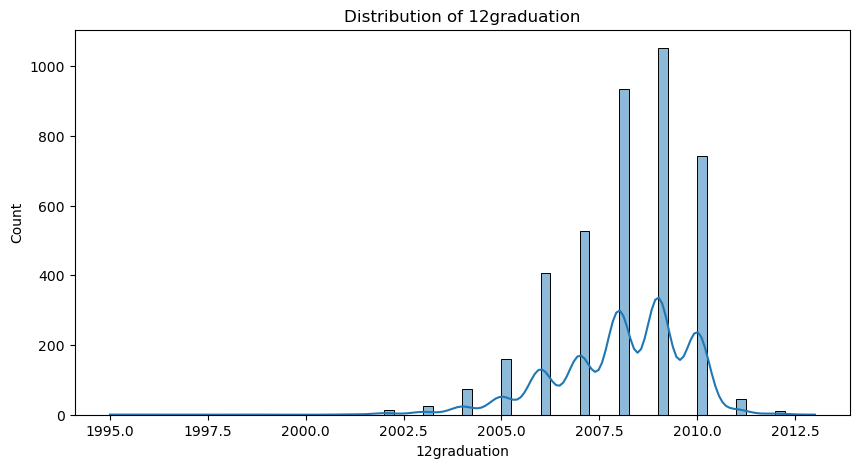

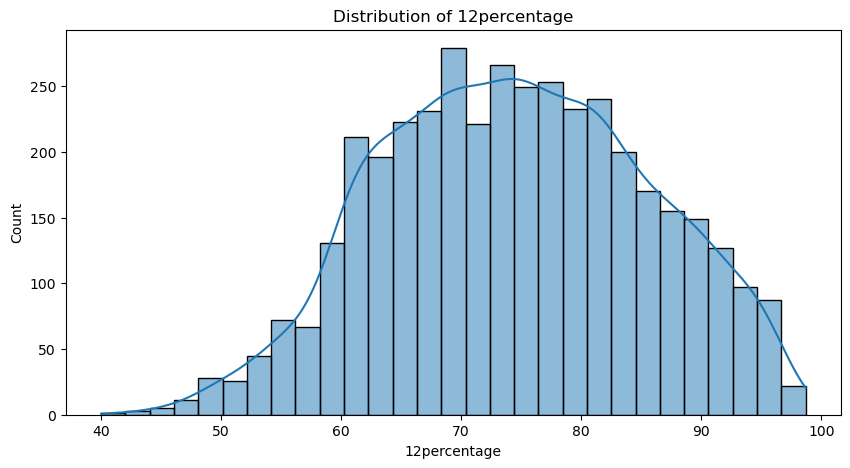

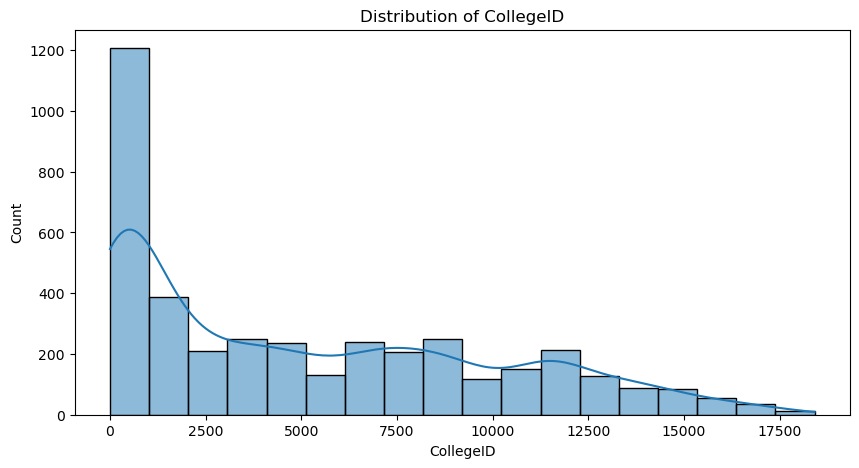

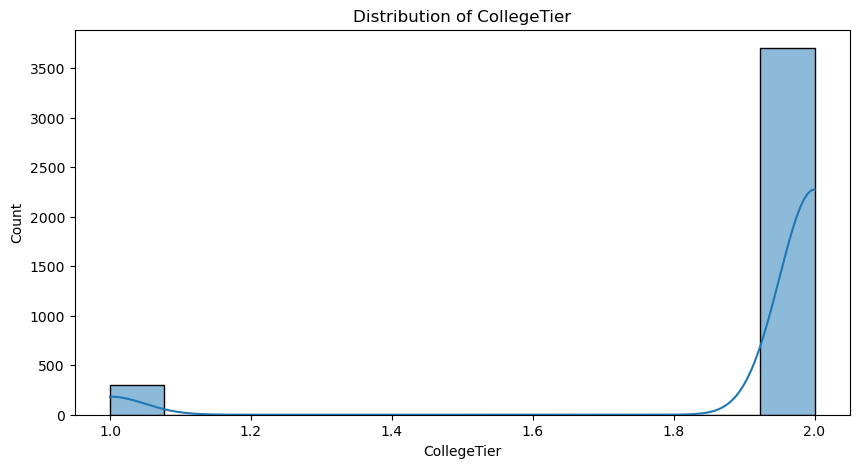

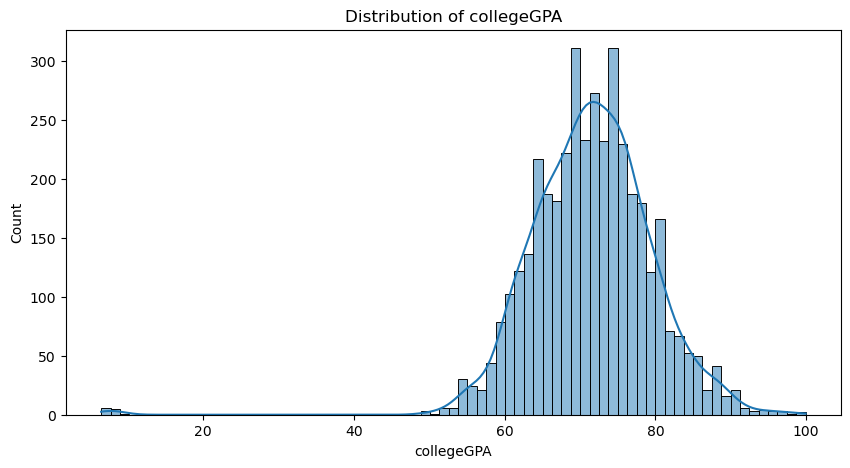

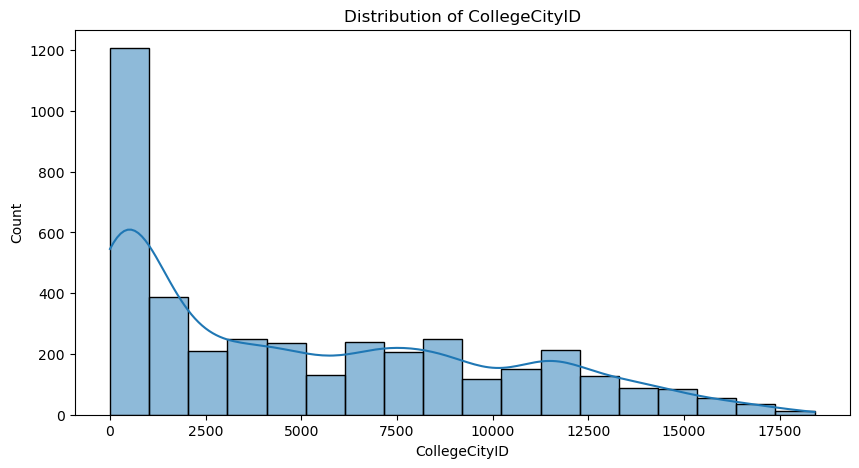

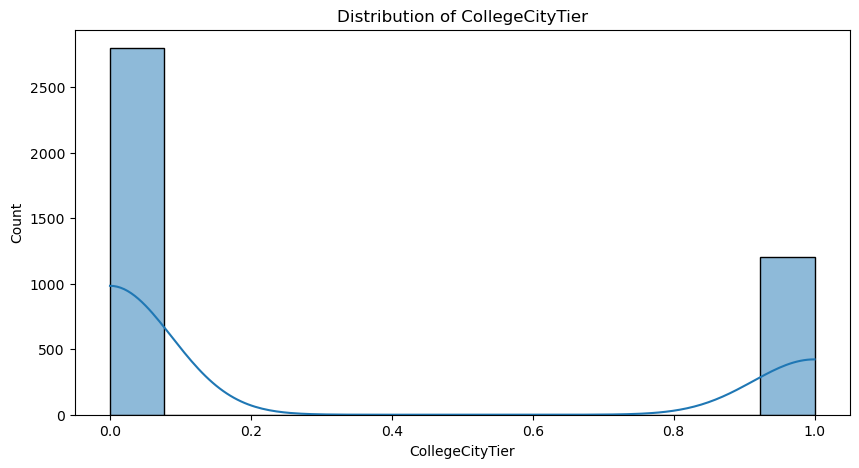

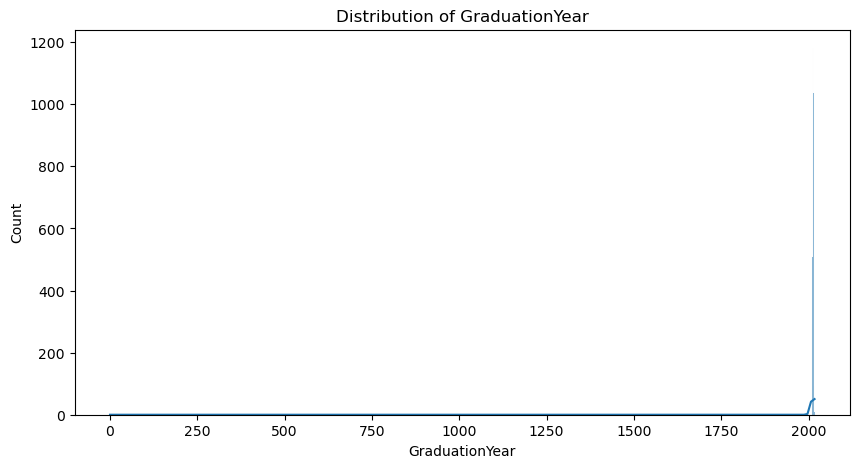

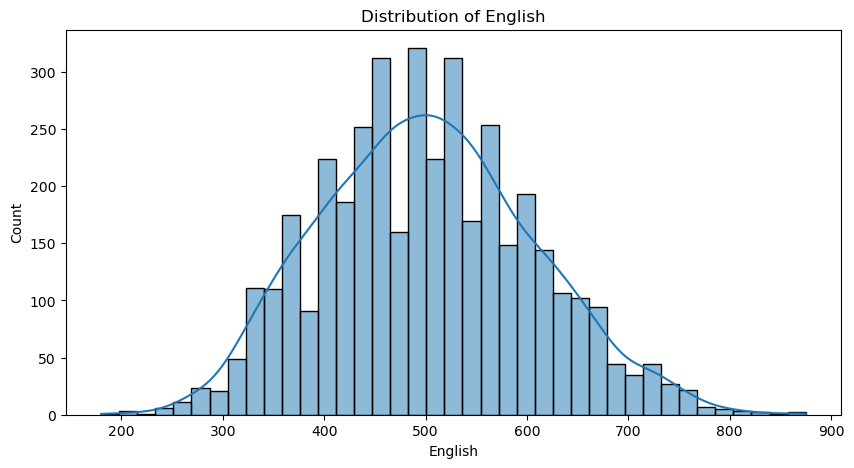

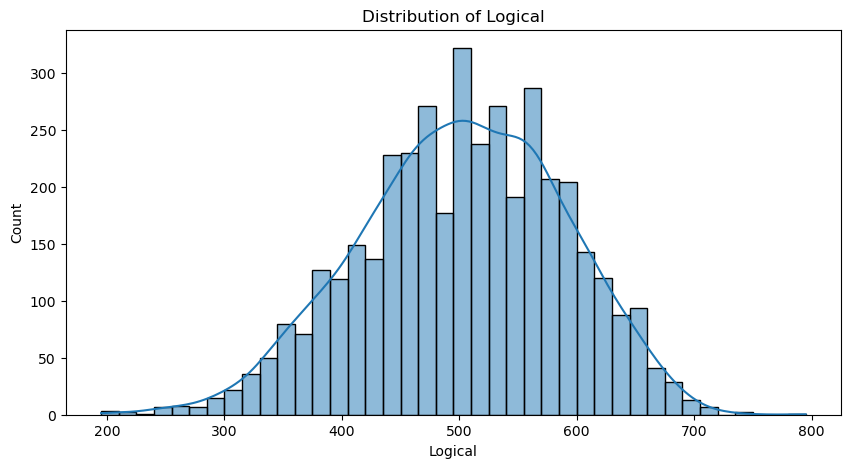

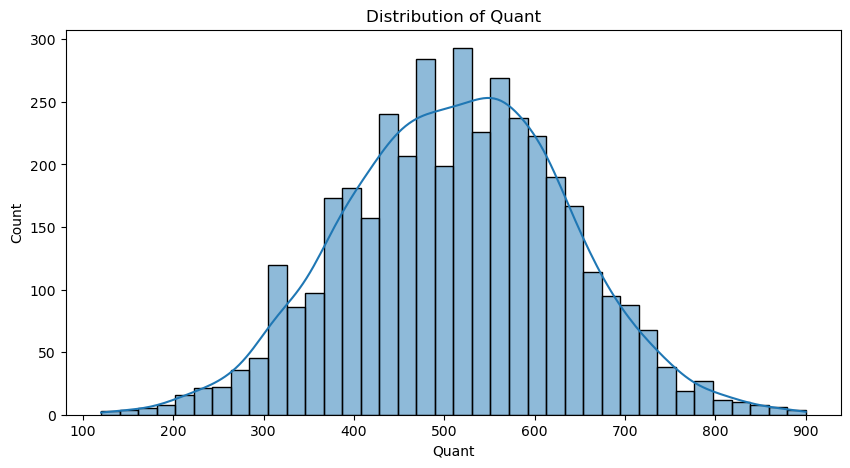

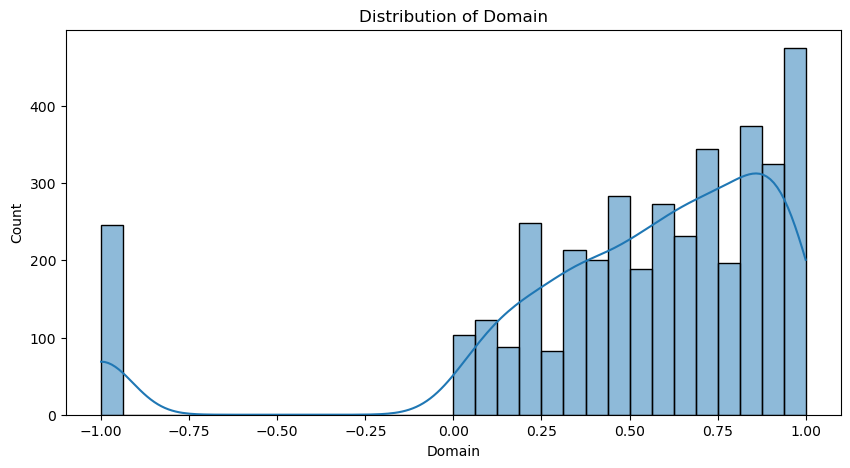

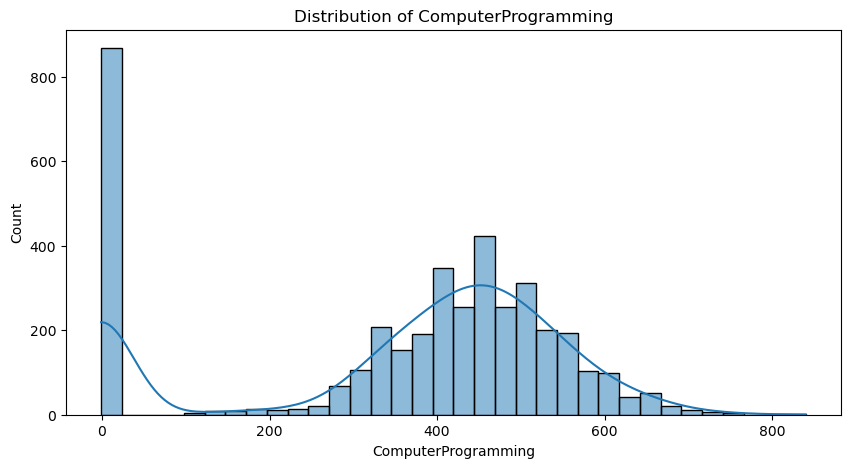

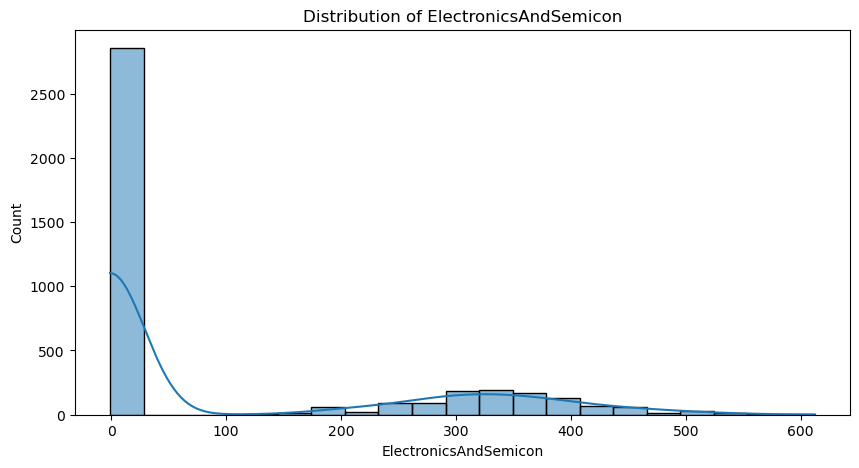

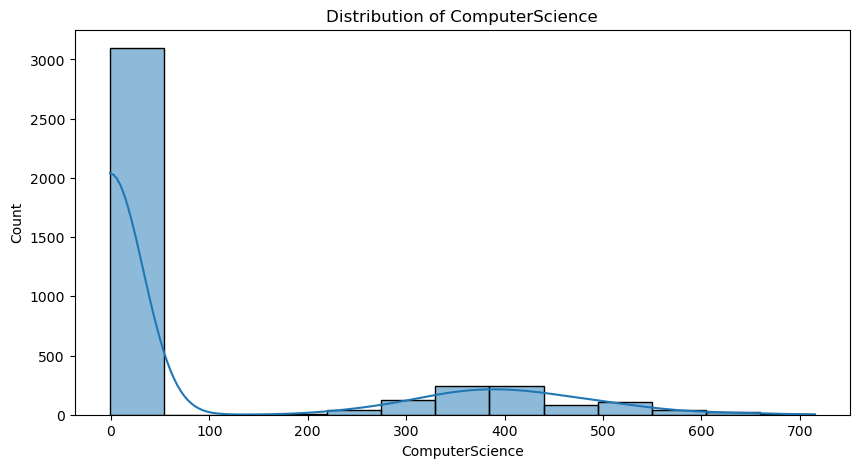

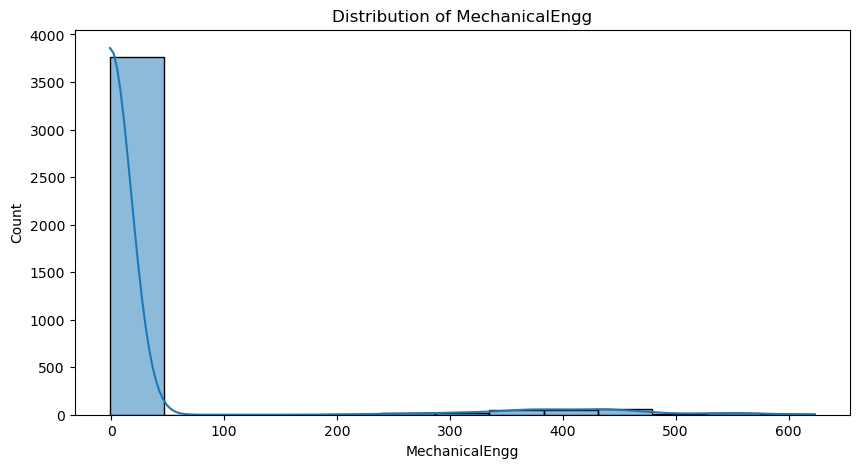

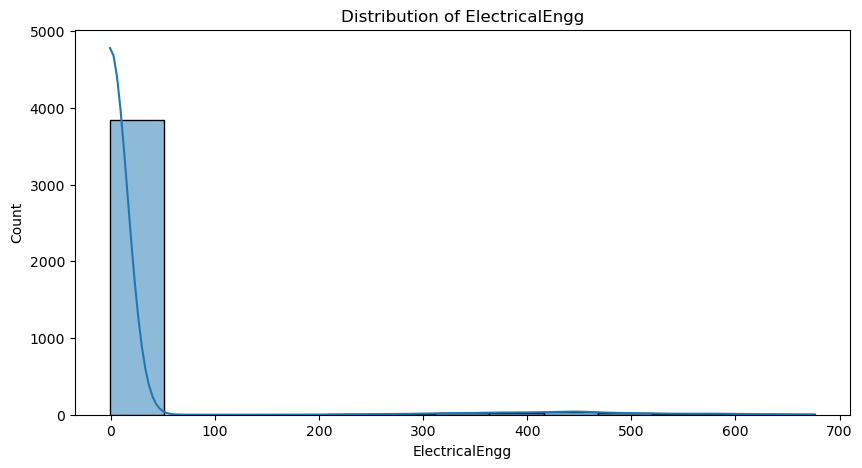

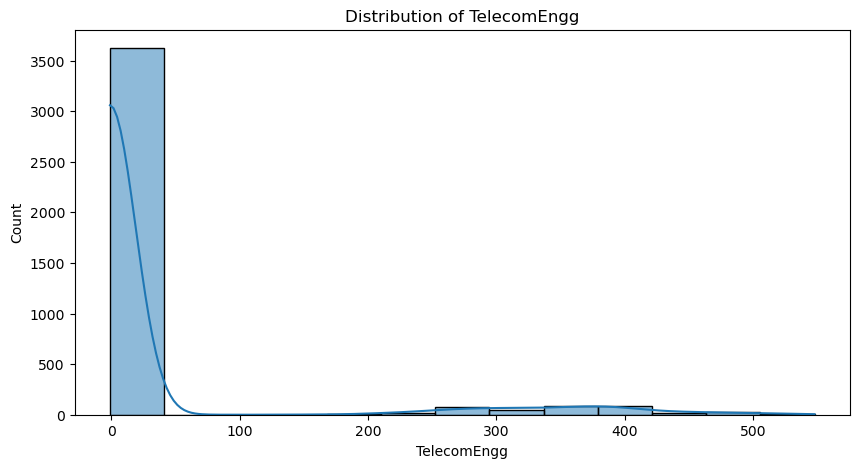

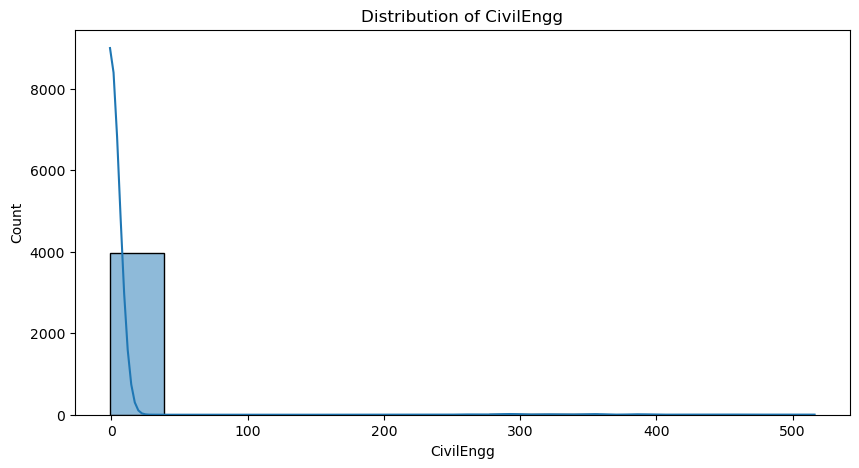

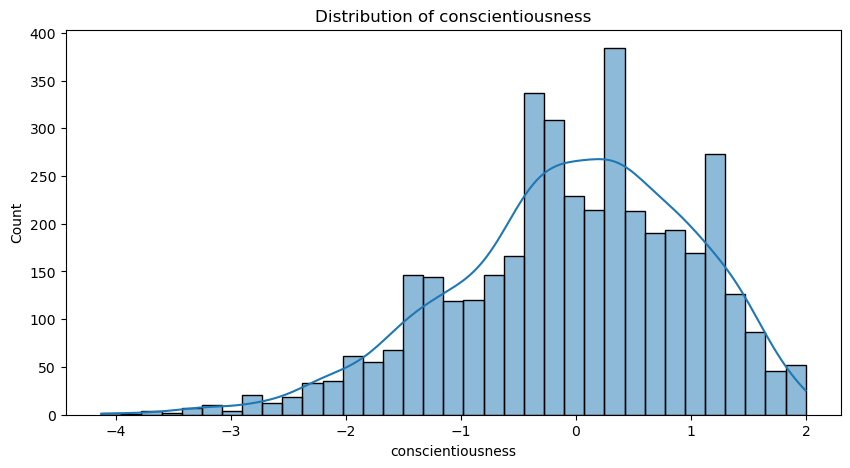

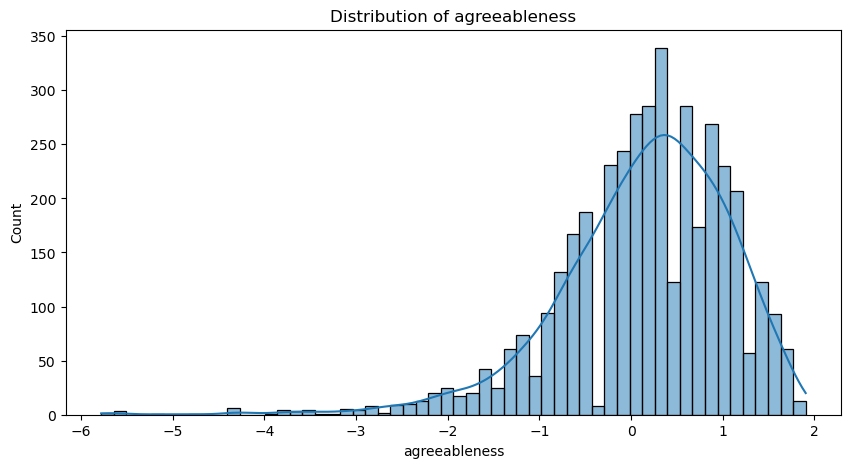

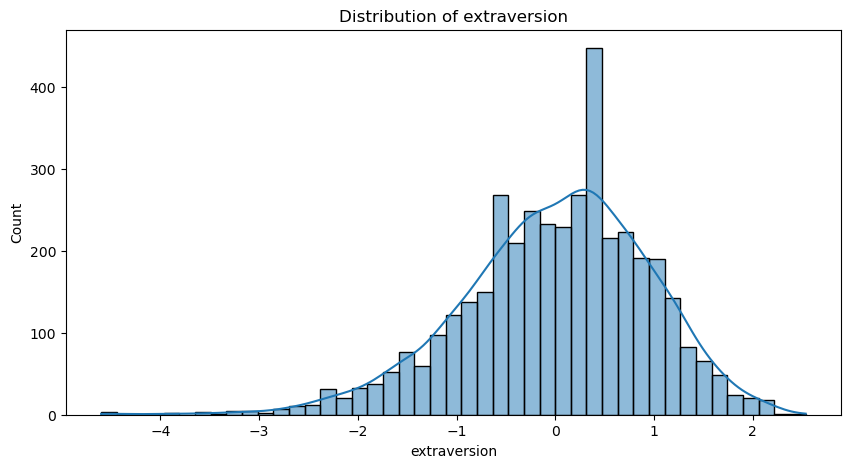

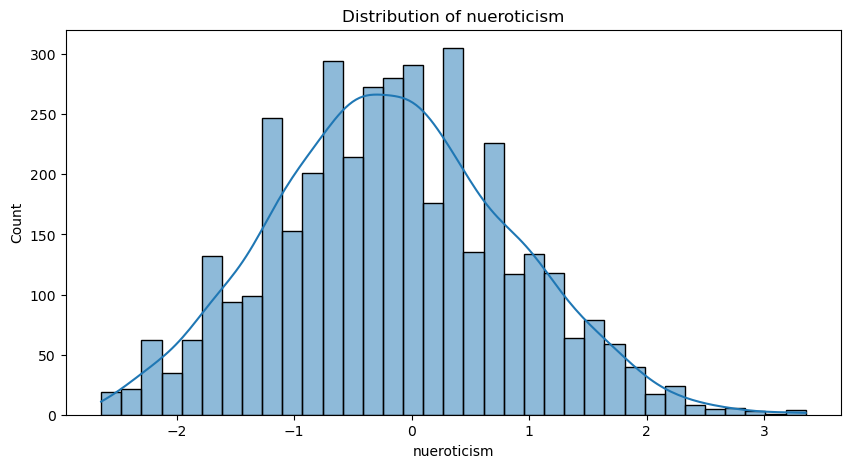

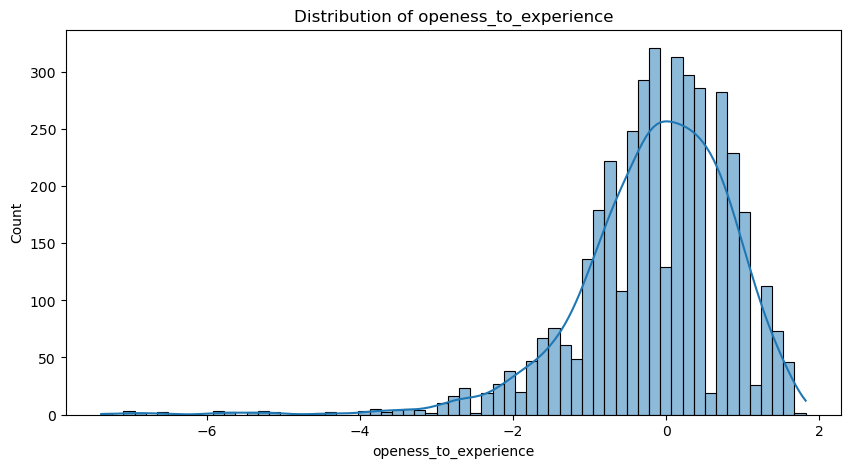

In [16]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 7.Boxplot - Numerical Columns

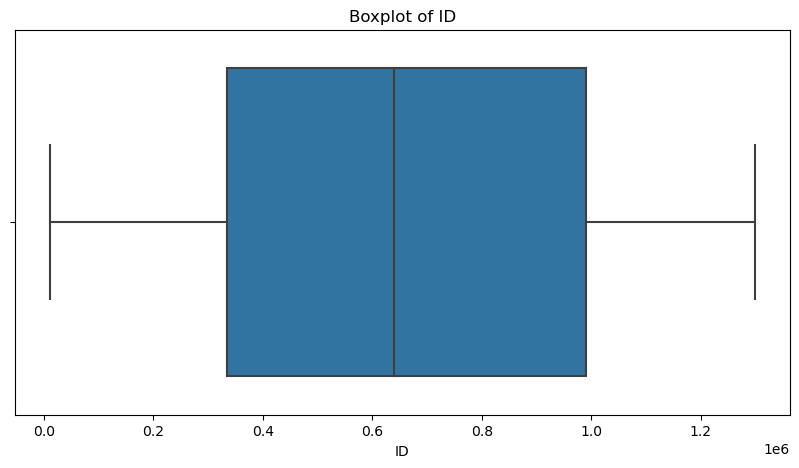

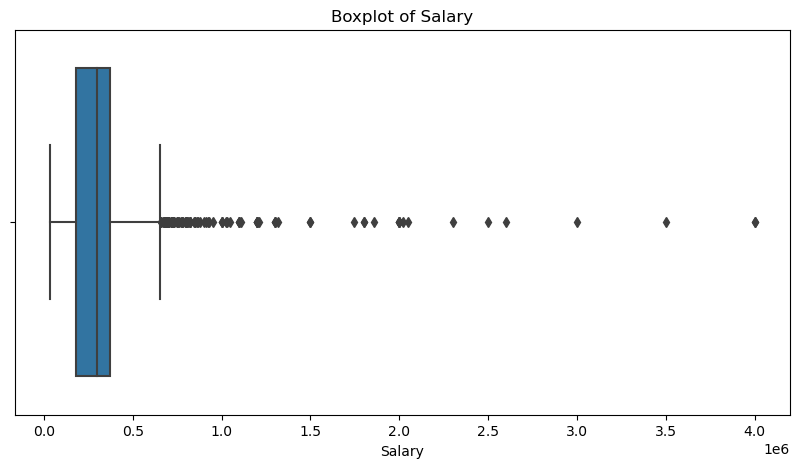

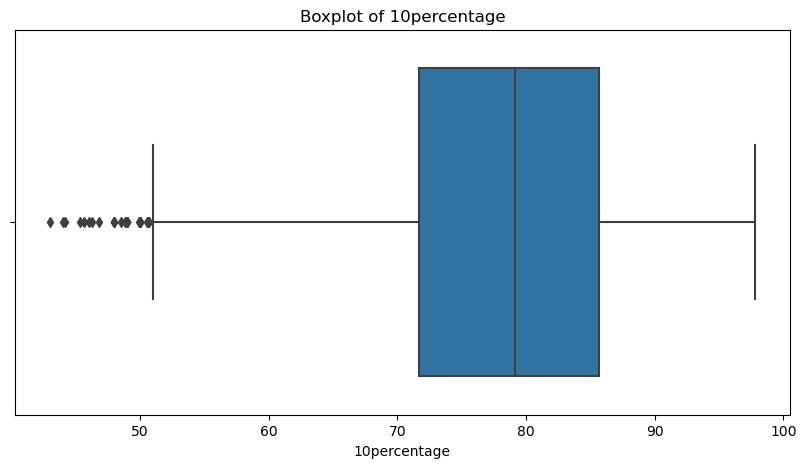

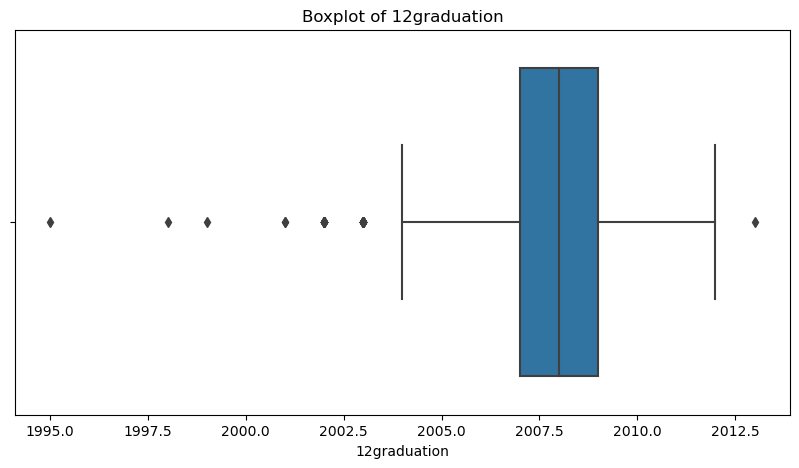

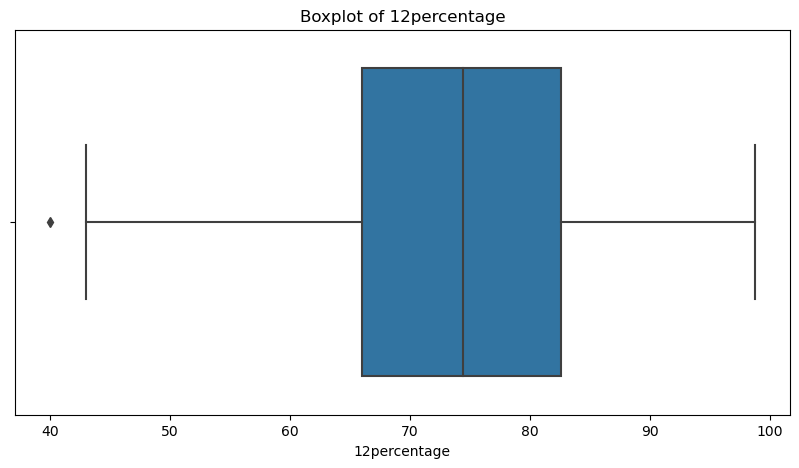

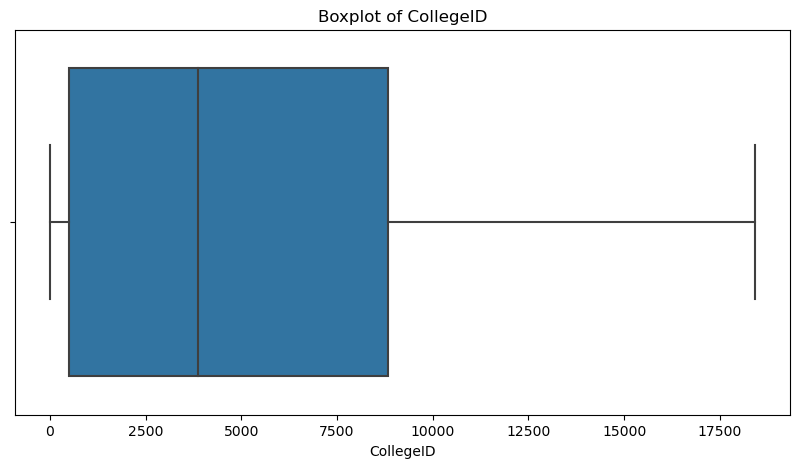

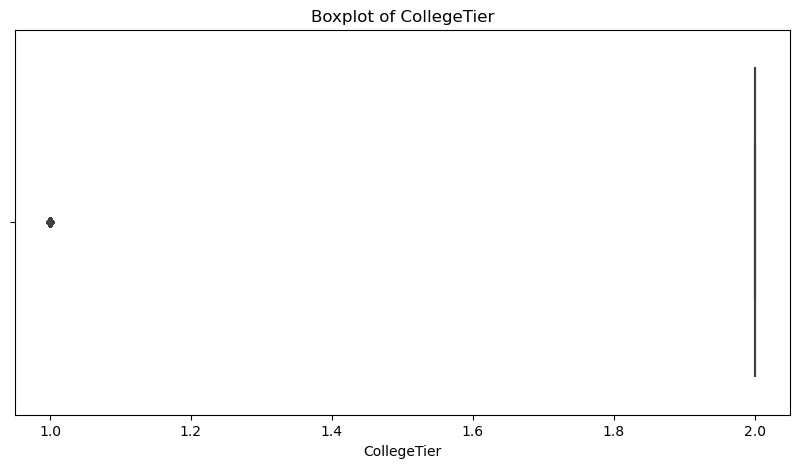

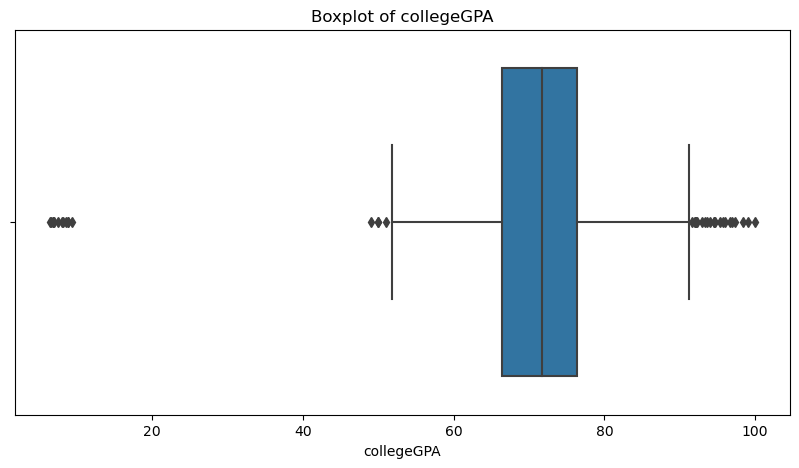

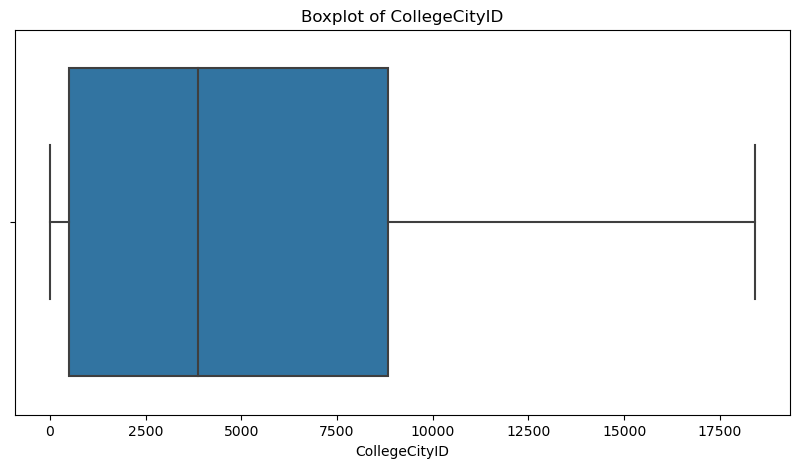

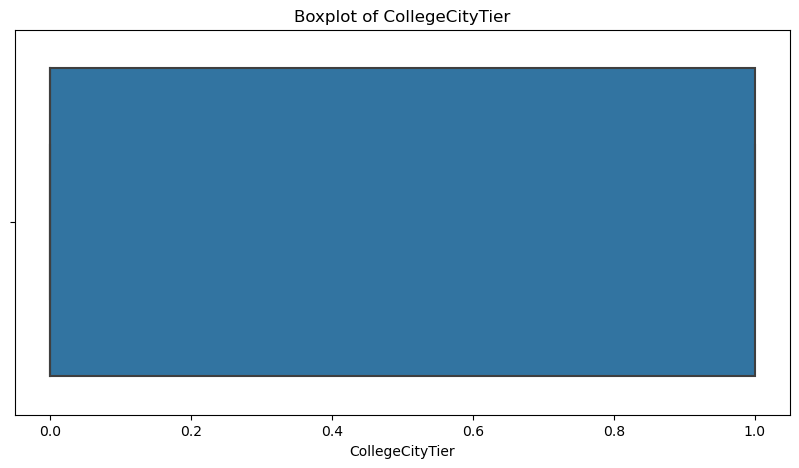

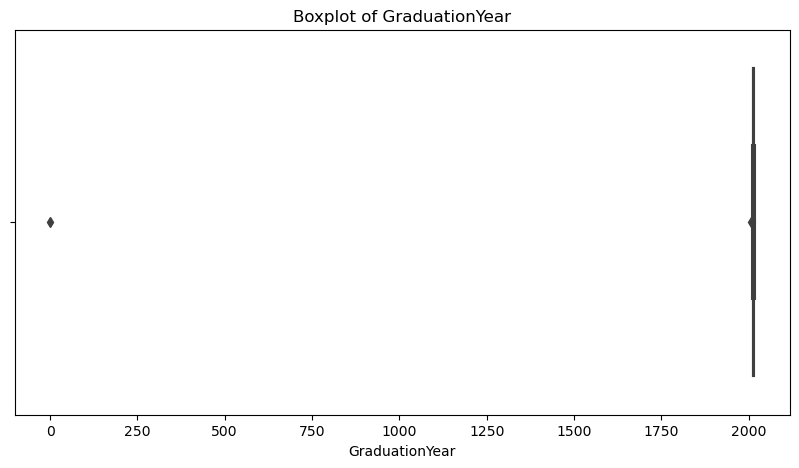

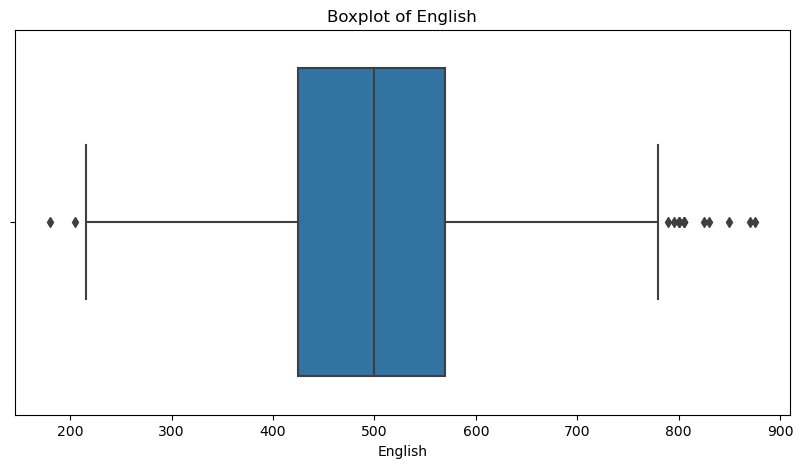

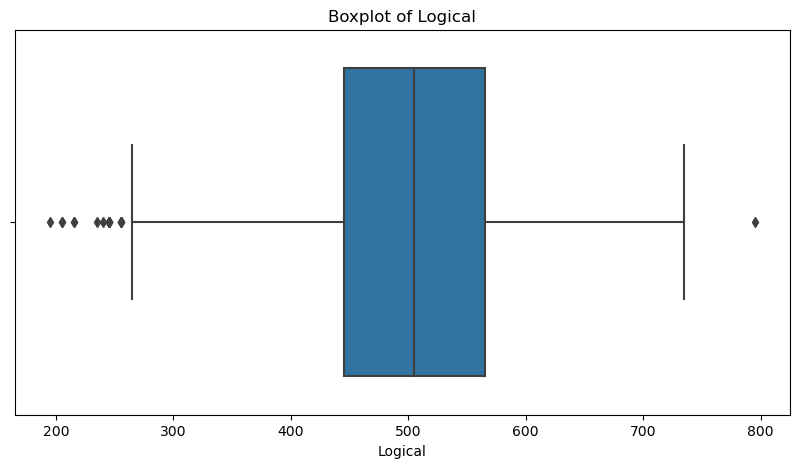

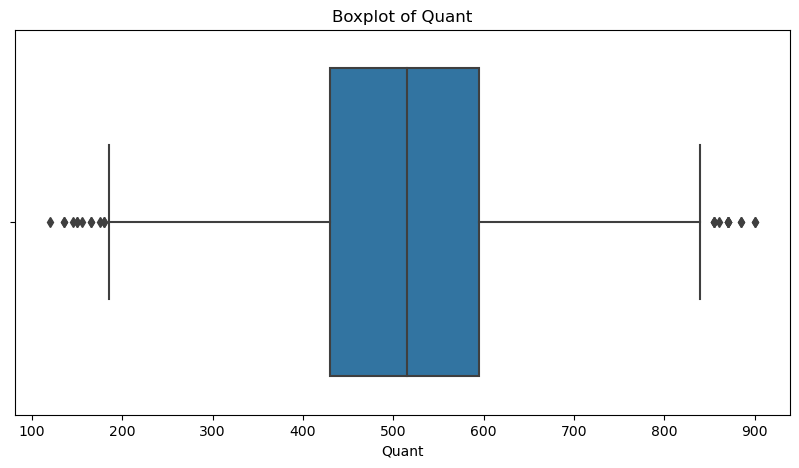

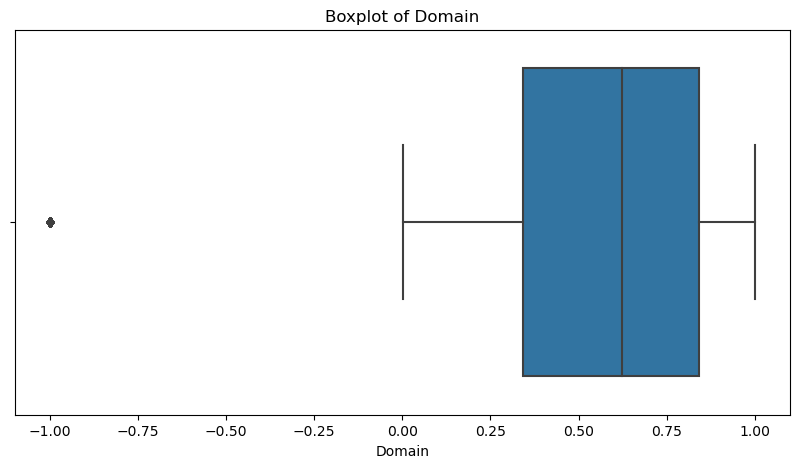

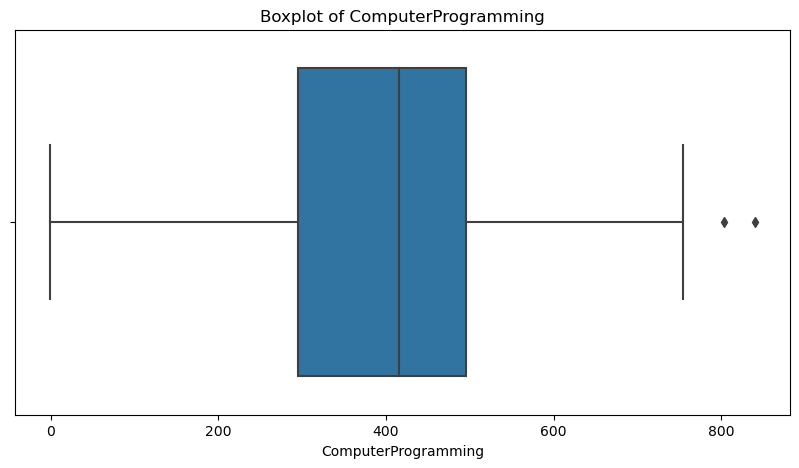

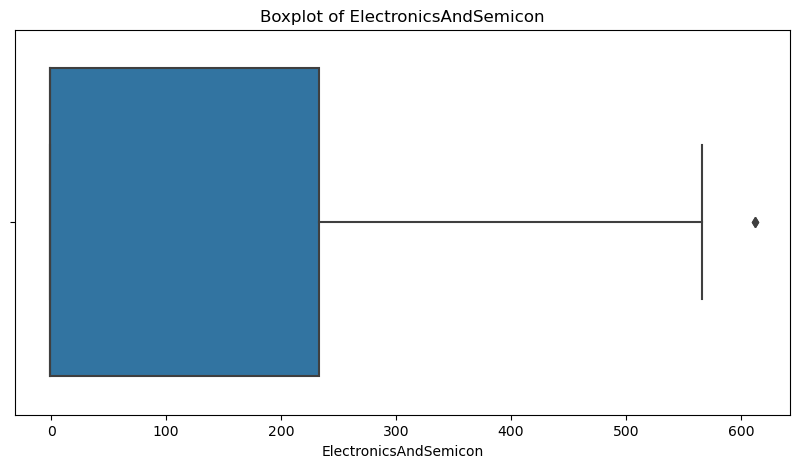

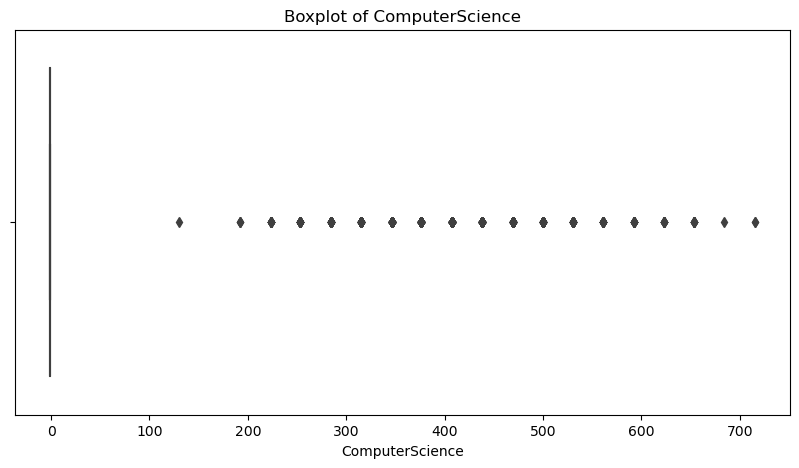

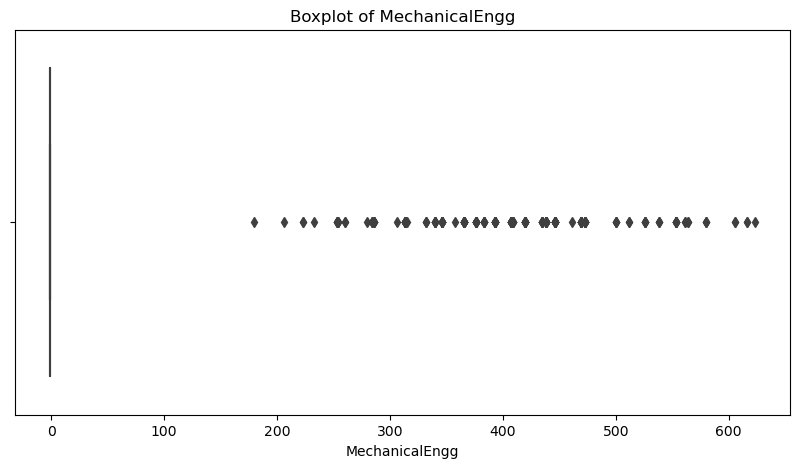

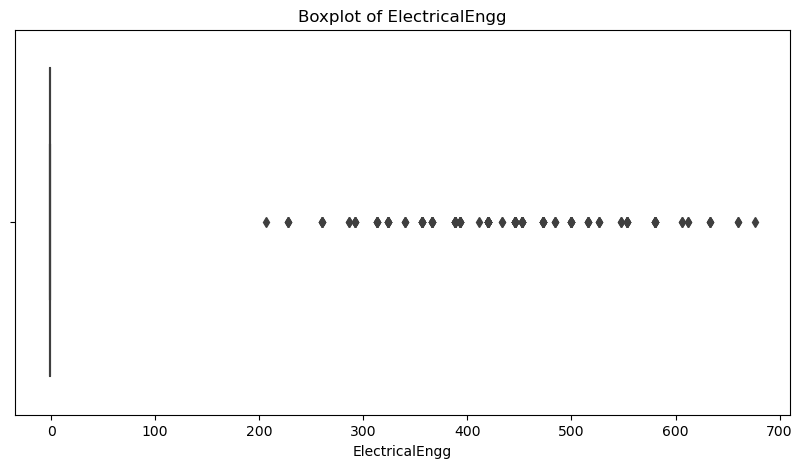

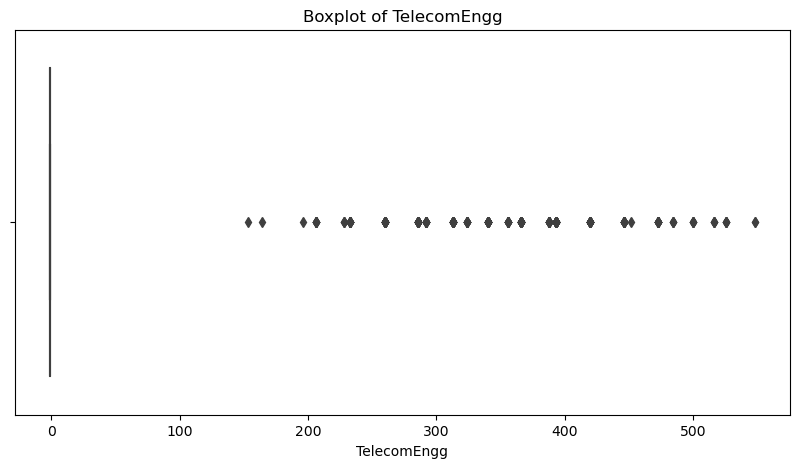

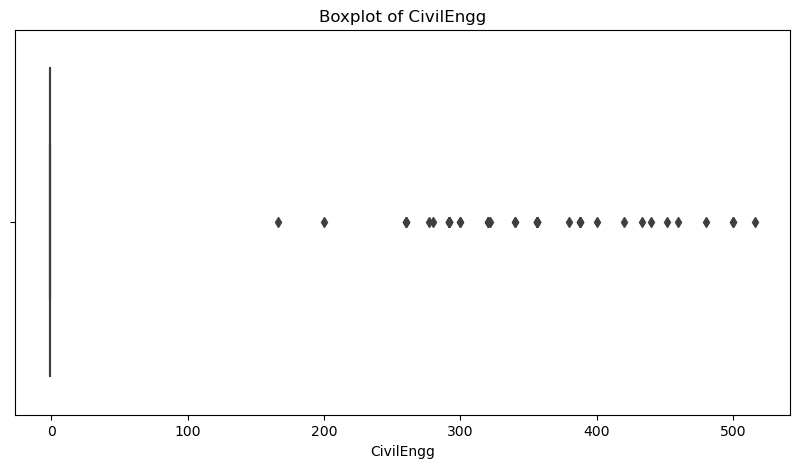

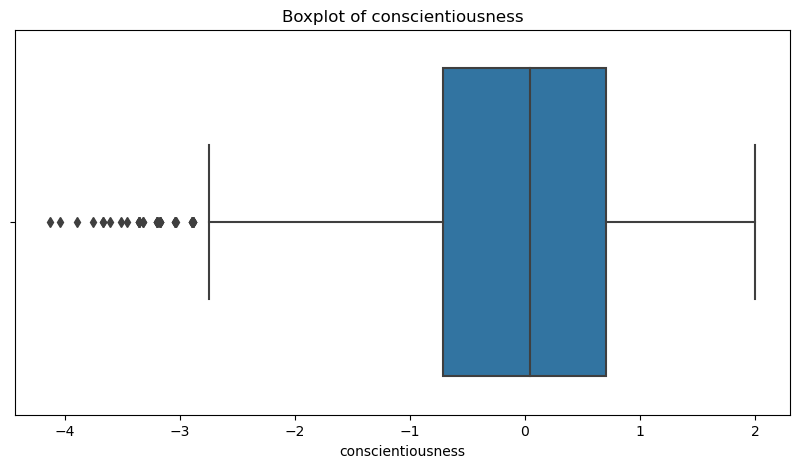

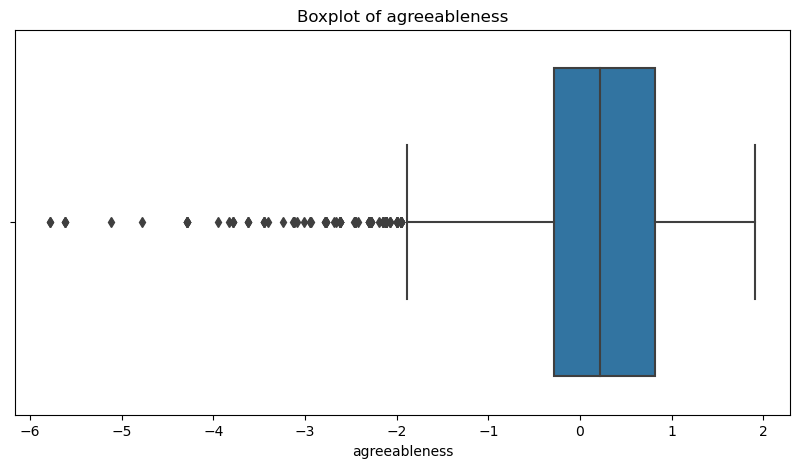

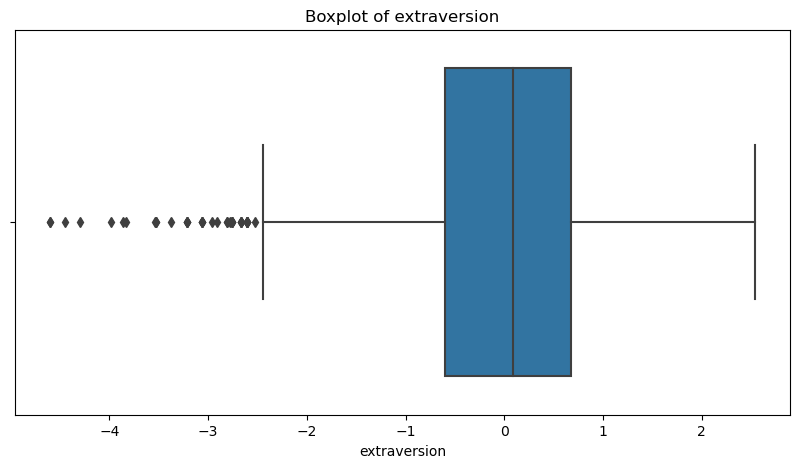

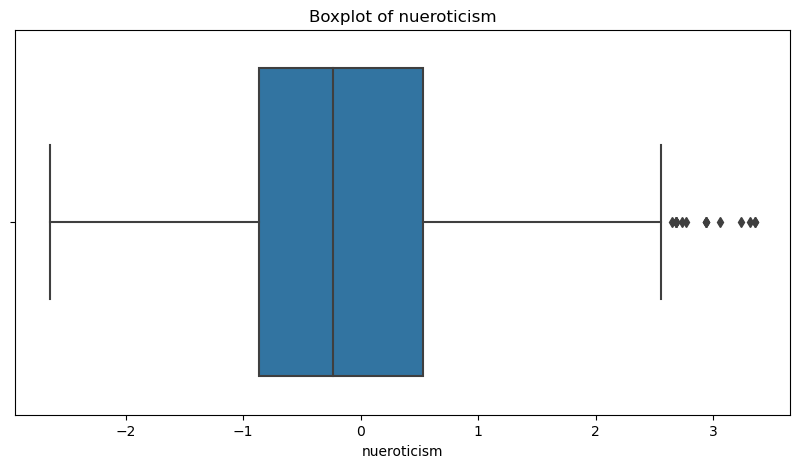

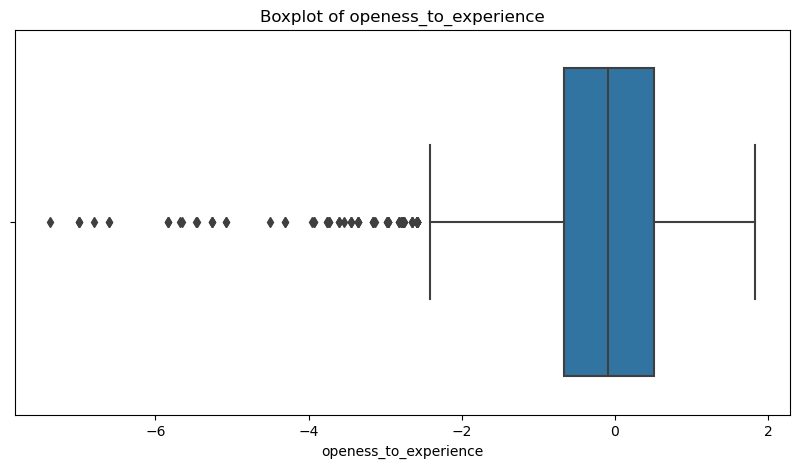

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Univariate Analysis: Categorical Variables

# 1.Distribution of Gender 

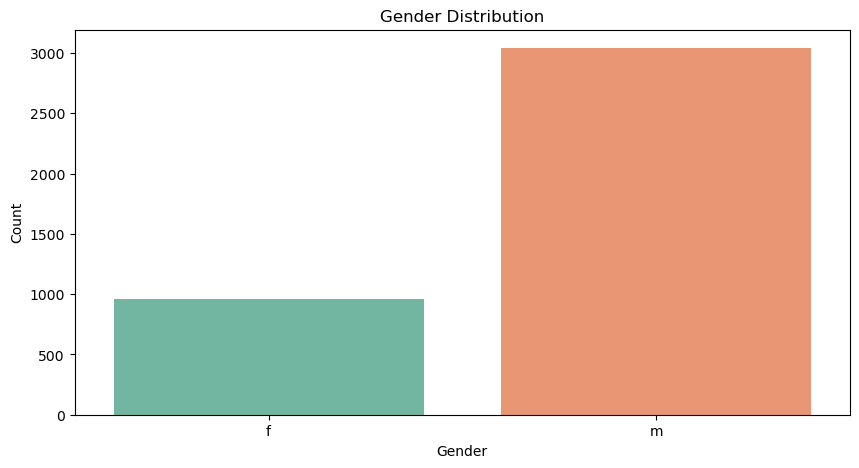

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Observation:**
    
The dataset shows a higher number of male students compared to female students, indicating a gender imbalance in engineering disciplines. This suggests that engineering fields may have a disproportionate representation of males, highlighting potential gender disparities in these areas of study.

# 2.Distribution of Degree

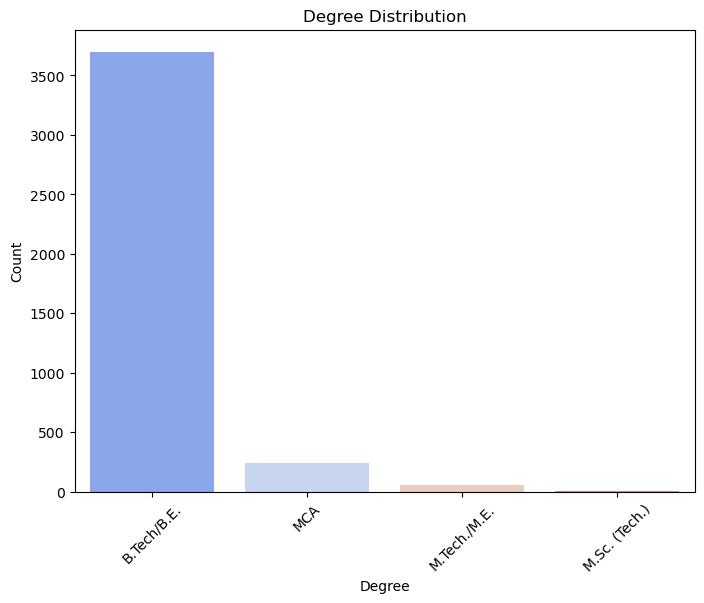

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Degree', data=df, palette='coolwarm')
plt.title('Degree Distribution')
plt.xticks(rotation=45)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Observation:**
    
The most common degree among the students in the dataset is B.Tech (Bachelor of Technology). This suggests that a significant portion of the student population is pursuing or has completed technical education, which may reflect the popularity and demand for engineering and technology-related fields.

# 3.Which Specialization is most common among the students?

In [20]:
df["Specialization"].value_counts().head(10)

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

# 4.Distribution of Specialization

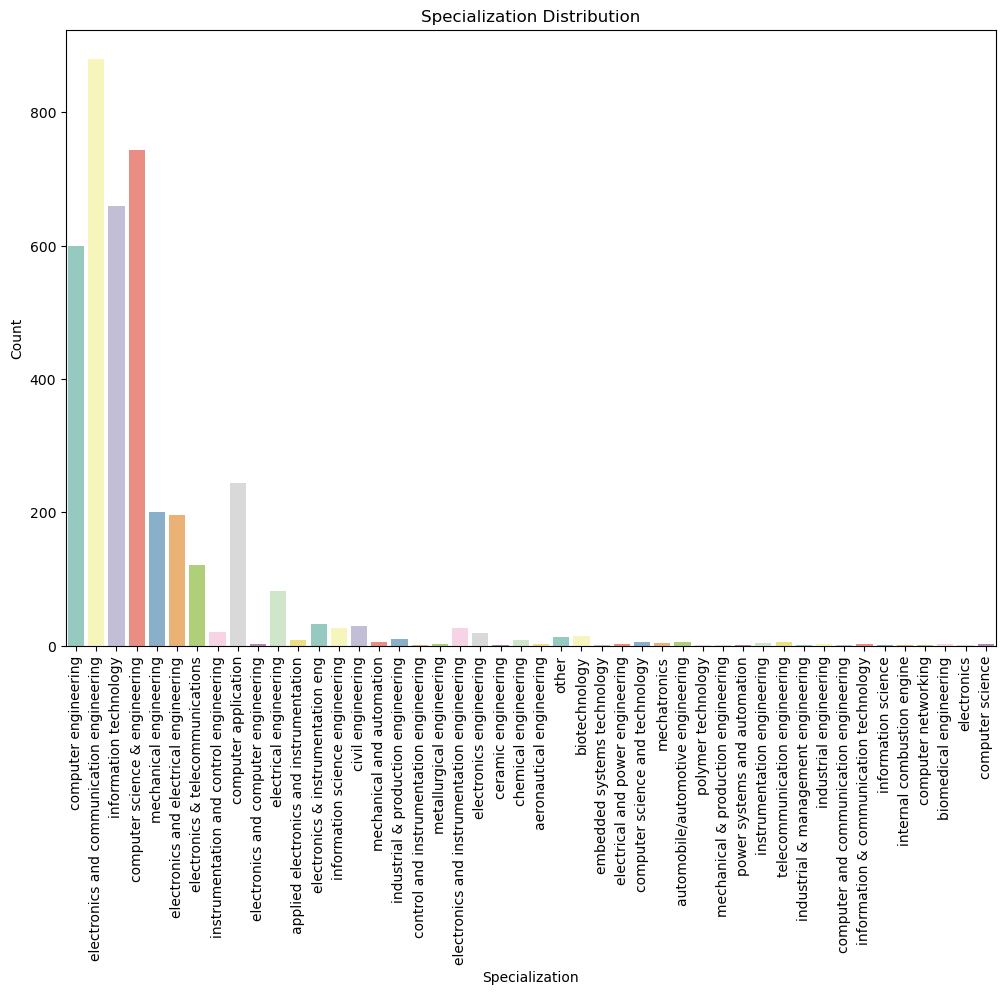

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Specialization', data=df, palette='Set3')
plt.title('Specialization Distribution')
plt.xticks(rotation=90)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.show()

**Observation:**
    
Computer Science Engineering (CSE) is the most popular specialization, followed by Mechanical Engineering and Electronics and Communication Engineering. This trend highlights the strong interest in technology-focused disciplines among students.

# Bivariate Analysis: 

#  Numerical vs Numerical
# 1. Salary vs 10th Percentage

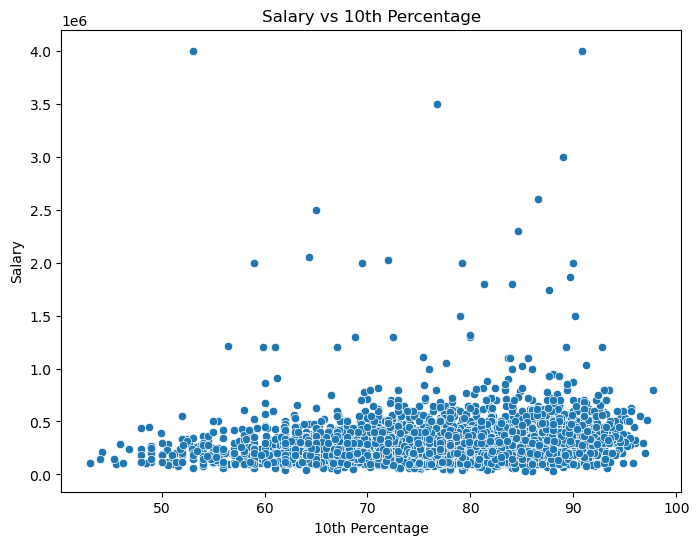

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.title('Salary vs 10th Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
There is no clear linear relationship between 10th-grade percentages and salary, as some students with lower percentages are earning higher salaries. This indicates that early academic performance may not strongly correlate with job outcomes in the long term.

# 2.Salary vs 12th Percentage

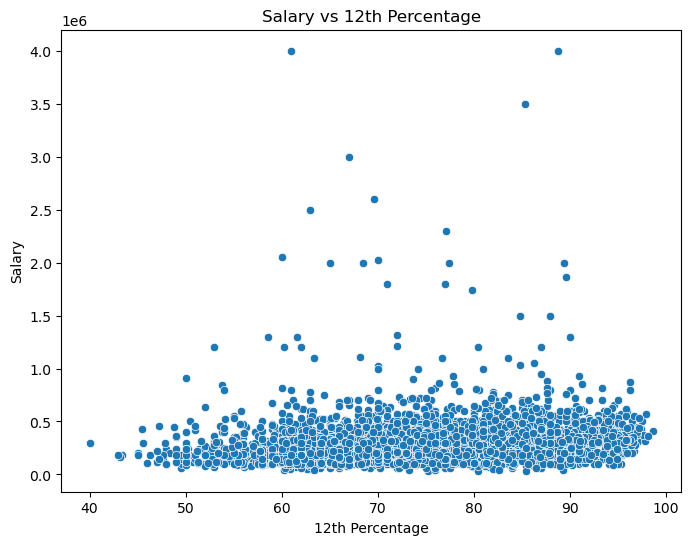

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='12percentage', y='Salary', data=df)
plt.title('Salary vs 12th Percentage')
plt.xlabel('12th Percentage')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
Similar to the 10th-grade results, there is no strong correlation between 12th-grade percentage and salary. This suggests that high school academic performance may not directly influence salary outcomes in the job market.

# 3.Salary vs College GPA

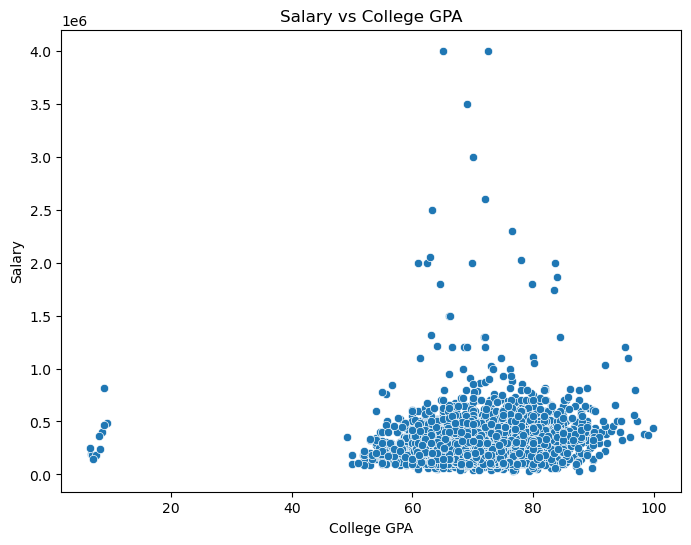

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
There is a slight positive trend between college GPA and salary, indicating that higher GPAs are associated with slightly higher salaries. However, this relationship is not very strong, suggesting that other factors may also significantly influence salary outcomes.

# Categorical vs Numerical
# 1. Gender vs Salary

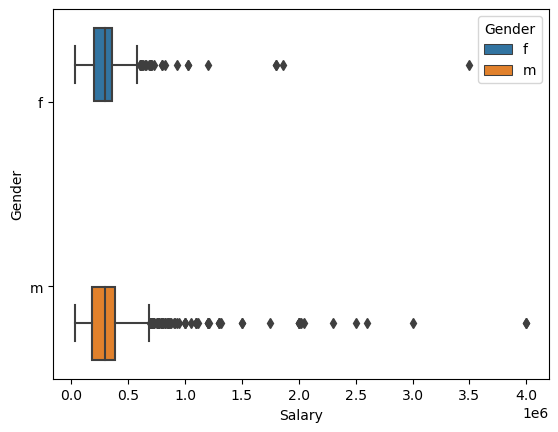

In [25]:
sns.boxplot(y=df["Gender"],x=df["Salary"],hue=df["Gender"])
plt.show()

**Observation:**
    
There is a noticeable difference in salary distribution between genders, with males earning higher salaries on average than females. However, there are outliers in both categories, indicating that some females earn significantly higher salaries than their male counterparts, and vice versa.

# 2.Specialization vs Salary

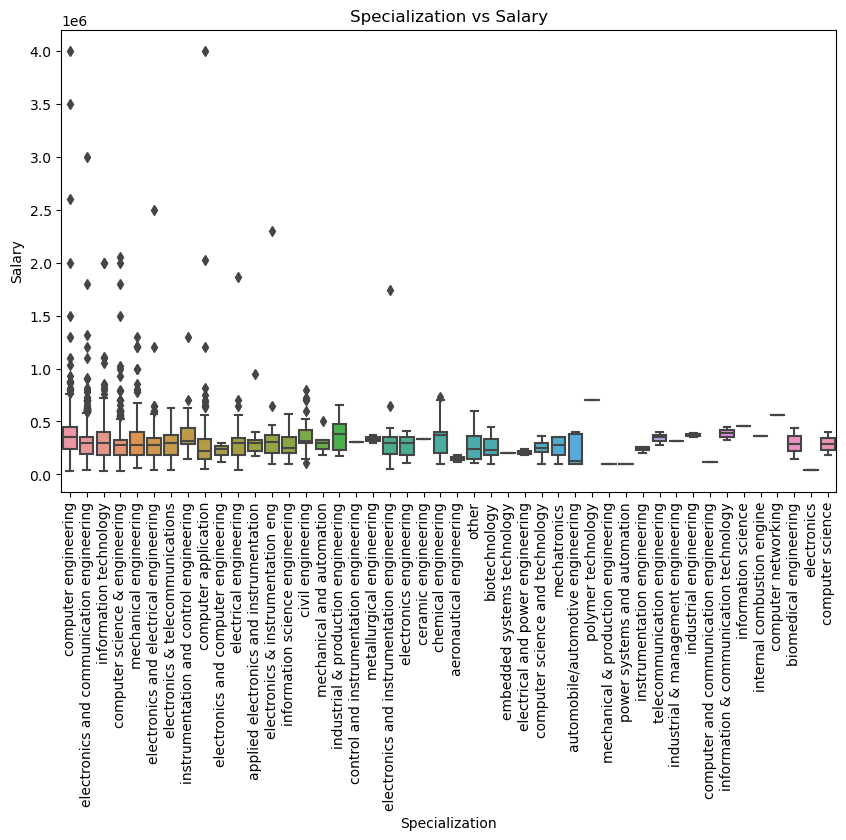

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Specialization vs Salary')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
Students specializing in Computer Science and Electronics generally earn higher salaries compared to those in Civil or Mechanical Engineering. Additionally, there are notable high-salary outliers within the Computer Science specialization, highlighting the lucrative opportunities in tech-related fields.

# 3.College Tier vs Salary.

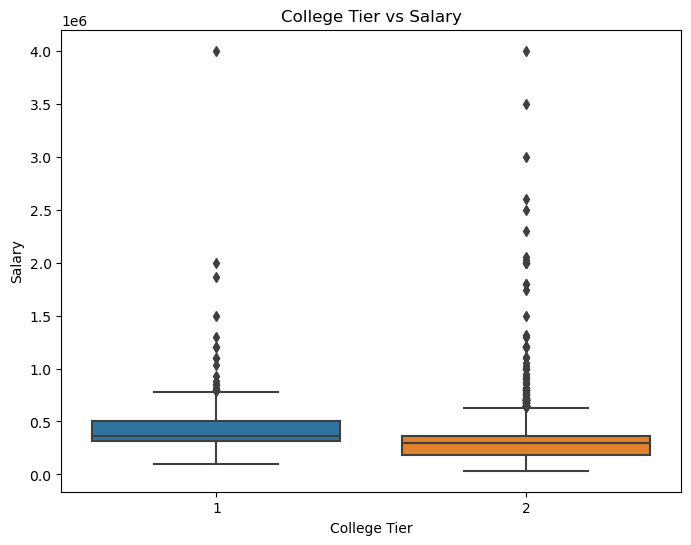

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('College Tier vs Salary')
plt.xlabel('College Tier')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
Students from Tier 1 colleges tend to earn higher salaries compared to those from Tier 2 and Tier 3 colleges. This suggests that the reputation or tier of the college may significantly influence salary outcomes for graduates.

# Categorical vs Categorical
# 1. Gender vs Specialization

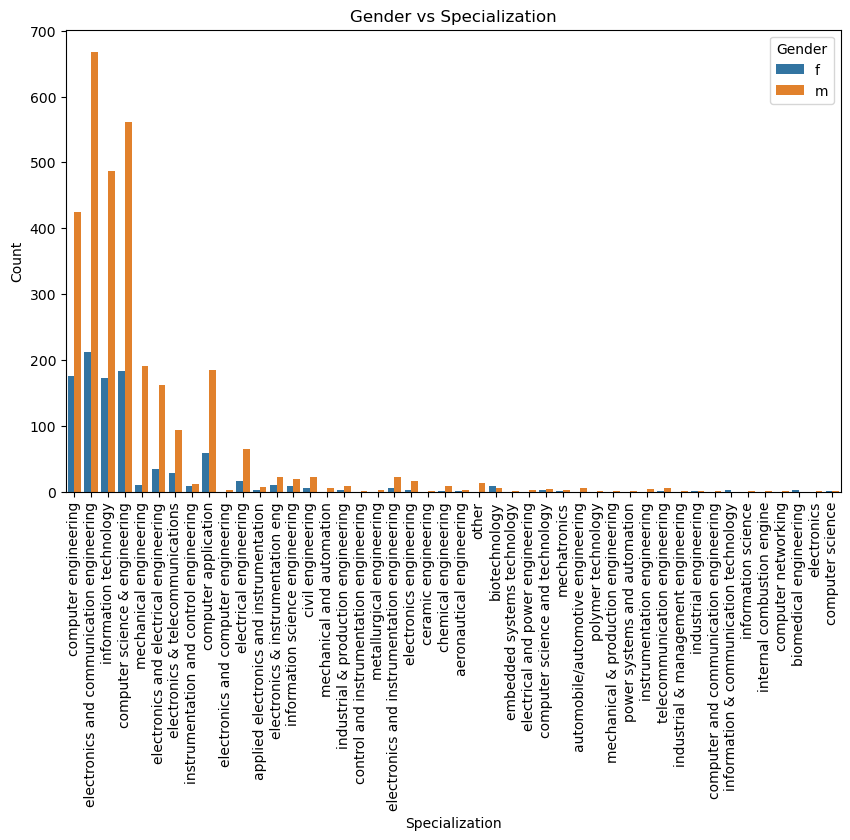

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=df)
plt.xticks(rotation=90)
plt.title('Gender vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.show()

**Observation:**
    
In most specializations, males outnumber females. However, fields like Computer Science show a more balanced gender distribution, whereas Mechanical and Electrical Engineering are predominantly male-dominated.

# 2.College Tier vs Gender

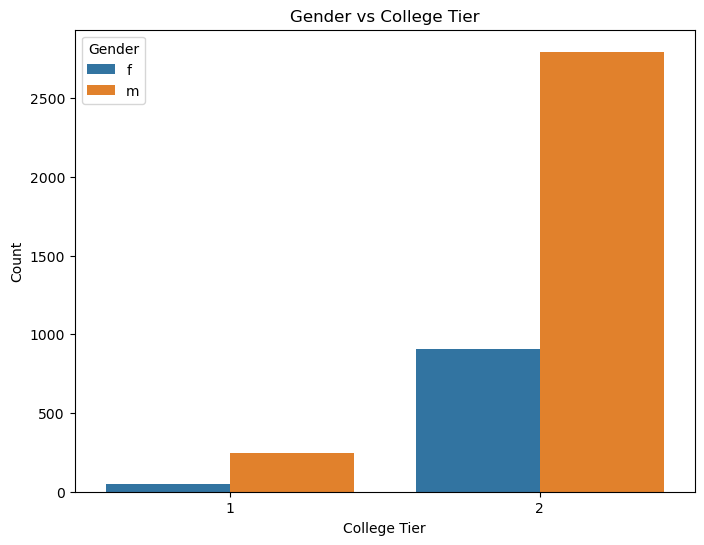

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CollegeTier', hue='Gender', data=df)
plt.title('Gender vs College Tier')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.show()

**Observation:**
    
Males are more prevalent across all college tiers, but the gender distribution remains relatively consistent across different tiers. This indicates that while there is a higher number of male students overall, the ratio of males to females does not vary significantly by college tier.

# 3.College GPA vs Specialization

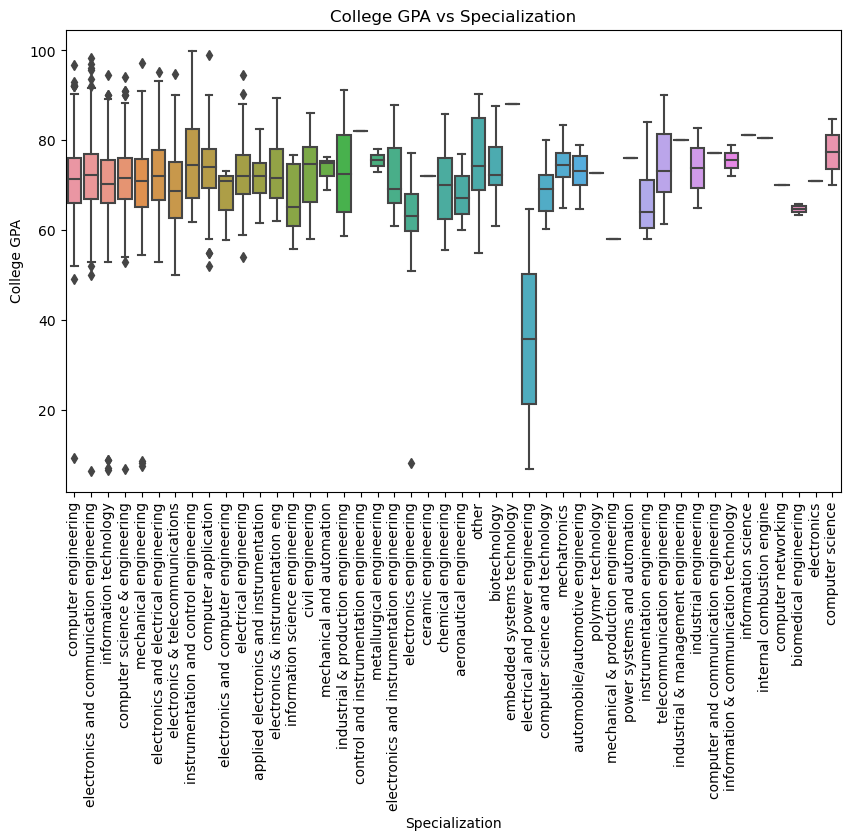

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Specialization', y='collegeGPA', data=df)
plt.xticks(rotation=90)
plt.title('College GPA vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('College GPA')
plt.show()

**Observation:**
    
College GPA tends to be higher for students specializing in Computer Science and Electronics compared to those in Mechanical, Electrical, and Civil Engineering. Additionally, there is less variation in GPA among students in Mechanical and Civil Engineering specializations.

# Cognitive Skills vs Salary
# 1. Logical Scores vs Salary

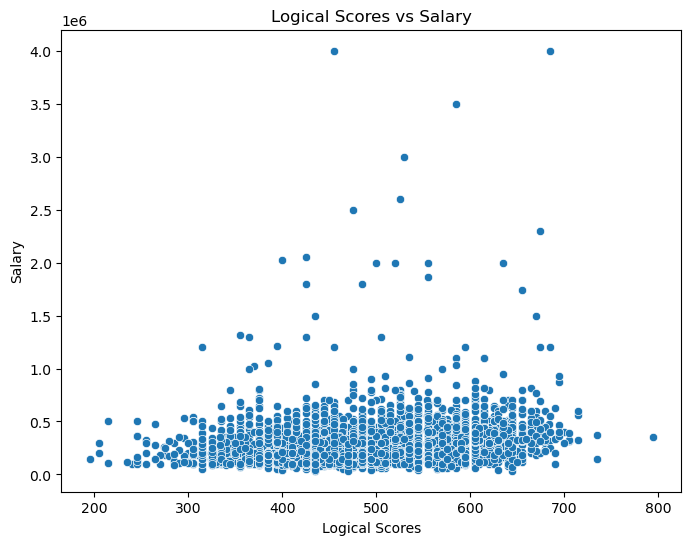

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logical', y='Salary', data=df)
plt.title('Logical Scores vs Salary')
plt.xlabel('Logical Scores')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
There is no strong relationship between logical reasoning scores and salary, indicating that cognitive skills alone may not significantly influence salary outcomes in the job market.

# 2.Quantitative Scores vs Salary

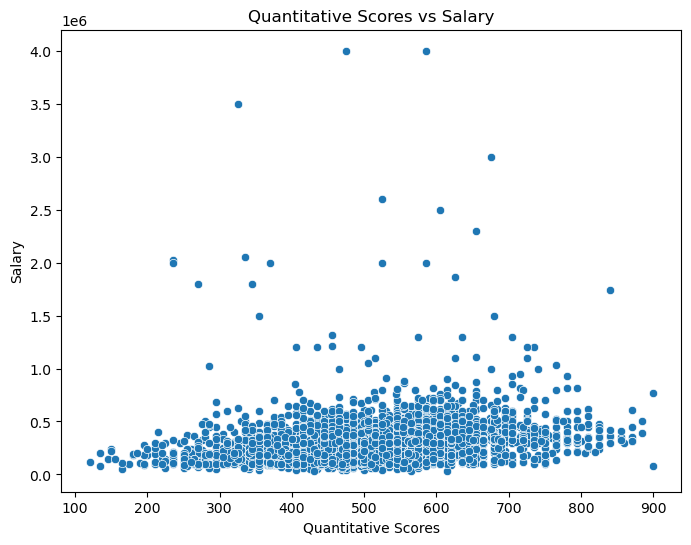

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quant', y='Salary', data=df)
plt.title('Quantitative Scores vs Salary')
plt.xlabel('Quantitative Scores')
plt.ylabel('Salary')
plt.show()

**Observation:**
    
Similar to logical reasoning scores, there is no clear correlation between quantitative scores and salary. High scores in this category do not necessarily result in higher salaries, suggesting that other factors may play a more significant role in salary determination.

In [ ]:
# Pairplot for numerical columns (Scatter Plot)
sns.pairplot(df[numerical_cols])
plt.show()

In [ ]:
# Boxplot for Categorical vs Numerical Columns
sns.boxplot(x='Specialization', y='Salary', data=df)  # Replace with appropriate columns
plt.title('Salary vs Specialization')
plt.show()

In [ ]:
# Stacked Barplot for Categorical vs Categorical Columns
pd.crosstab(df['Gender'], df['Specialization']).plot(kind='bar', stacked=True)
plt.title('Gender vs Specialization')
plt.show()

# Multivariate Analysis

**1.How does Quant, Logical, and English scores collectively impact the Salary?**

In [ ]:
sns.pairplot(df, vars=['Quant', 'Logical', 'English'], hue='Salary')
plt.show()

**2.Different Engineering specializations contribute to Salary**

In [ ]:
df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

In [ ]:
sns.heatmap(df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg','Salary']].corr(),annot=True,cmap="viridis")
plt.show()

**3.Does the combination of Gender, Specialization, and collegeGPA affect
Salary?**

In [ ]:
grp_df=df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean()
grp_df

**4.Times of India article dated Jan 18, 2019 states that “After doing your
Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.**

In [ ]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000 # Convert lakhs to the actual unit (e.g.,2.75 lakhs = 275000)
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05 # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the average salary and the claimed mean.")

**5.Is there a relationship between gender and specialization? (i.e. Does the
preference of Specialisation depend on the Gender?)**

In [ ]:
from scipy import stats as st
cont_table=pd.crosstab(index=df["Specialization"],columns=df["Gender"])
Chi2_stat,p_value,dof,exp_freq=st.chi2_contingency(cont_table)
alpha = 0.05 # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the gender and Specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the gender and Specialization.")

**Analyzing the Relationship Between Gender and Specialization**

In [ ]:
# Chi-Square Test for Gender and Specialization
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=df)
plt.xticks(rotation=90)
plt.title('Gender vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.show()

**Observation:**
    
If the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between gender and specialization. Conversely, if the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that gender does not significantly impact the choice of specialization.

# Conclusion:
    
The dataset offers valuable insights into the employment outcomes of engineering graduates, showcasing a diverse range of salaries, job locations, and specializations. While technical and cognitive skills significantly influence job outcomes, the analysis indicates that demographic factors such as gender and specialization do not have a strong correlation with salary. This suggests that job opportunities in engineering are primarily merit-based, with skills and qualifications serving as the key determinants for career progression.